In [1]:
from notebook_setup import *

setting up ipython for notebook
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


done configuring ipython

working directory : /home/tyler/repos/binance-public-data/python/rsch

Python 3.10.13 | packaged by conda-forge | (main, Oct 26 2023, 18:07:37) [GCC 12.3.0]
Type 'copyright', 'credits' or 'license' for more information
IPython 8.15.0 -- An enhanced Interactive Python. Type '?' for help.



In [2]:
from typing import Optional


def perf_stats(pnl, freq: Optional[str]=None):
    # if freq is None:
    #     # infer the frequency as either 1T or 1D from the index of pnl df
    #     if pnl.index.freq is not None:
    #         freq = pnl.index.freqstr
    #     else:
    #         top_24 = pnl.iloc[:24]



    periods_per_yr = 252 * 1440
    # pnl = (sig.shift(1) * rets).sum(axis=1)
    sharpe = (pnl.mean() / pnl.std()) * np.sqrt(periods_per_yr)
    sortino = (pnl.mean() / pnl[pnl < 0].std()) * np.sqrt(periods_per_yr)
    max_dd = (pnl / pnl.cummax() - 1).min()
    pnl_mean = pnl.mean()
    pnl_std = pnl.std()
    
    return pd.Series({
        'sharpe': sharpe,
        'sortino': sortino,
        'max_dd': max_dd,
        'pnl_mean': pnl_mean,
        'pnl_std': pnl_std,
        'pnl_count': len(pnl),
        'pnl_std_err': pnl_std / np.sqrt(len(pnl)),
        'pnl_tstat': pnl_mean / (pnl_std / np.sqrt(len(pnl)))
    })

In [3]:
from arcticdb import Arctic
from etl import get_arcticdb_uri

ac = Arctic(get_arcticdb_uri())
lib_name = 'futures_um.klines.1m.secid'

In [4]:
start = '2020-01-01'
end = '2020-01-31'
start, end = pd.to_datetime([start, end])


btc = ac[lib_name].read('BTCUSDT', date_range=(start, end)).data
eth = ac[lib_name].read('ETHUSDT', date_range=(start, end)).data

In [5]:
btc

open_time      open      high       low  \
open_time                                                               
2020-01-01 00:00:00 2020-01-01 00:00:00 7189.4300 7190.5200 7177.0000   
2020-01-01 00:01:00 2020-01-01 00:01:00 7182.4300 7182.4400 7178.7500   
2020-01-01 00:02:00 2020-01-01 00:02:00 7179.0100 7179.0100 7175.2500   
2020-01-01 00:03:00 2020-01-01 00:03:00 7177.7700 7182.6000 7177.0000   
2020-01-01 00:04:00 2020-01-01 00:04:00 7179.1000 7179.1000 7172.9400   
...                                 ...       ...       ...       ...   
2020-01-30 23:56:00 2020-01-30 23:56:00 9534.4900 9541.1000 9534.4900   
2020-01-30 23:57:00 2020-01-30 23:57:00 9537.9200 9539.5600 9530.0000   
2020-01-30 23:58:00 2020-01-30 23:58:00 9531.6600 9531.6600 9520.0000   
2020-01-30 23:59:00 2020-01-30 23:59:00 9524.7900 9528.2400 9521.0000   
2020-01-31 00:00:00 2020-01-31 00:00:00 9525.6700 9531.4300 9520.8600   

                        close   volume              close_time  \
open_time                                                        
2020-01-01 00:00:00 7182.4400 246.0920 2020-01-01 00:00:59.999   
2020-01-01 00:01:00 7179.0100  70.9090 2020-01-01 00:01:59.999   
2020-01-01 00:02:00 7177.9300  99.4200 2020-01-01 00:02:59.999   
2020-01-01 00:03:00 7181.1100  69.3300 2020-01-01 00:03:59.999   
2020-01-01 00:04:00 7175.2500  97.3680 2020-01-01 00:04:59.999   
...                       ...      ...                     ...   
2020-01-30 23:56:00 9537.9200 201.7470 2020-01-30 23:56:59.999   
2020-01-30 23:57:00 9531.4200 127.5590 2020-01-30 23:57:59.999   
2020-01-30 23:58:00 9524.9900  82.8550 2020-01-30 23:58:59.999   
2020-01-30 23:59:00 9525.6700 100.1730 2020-01-30 23:59:59.999   
2020-01-31 00:00:00 9520.8600 113.1330 2020-01-31 00:00:59.999   

                     quote_asset_volume  number_of_trades  \
open_time                                                   
2020-01-01 00:00:00        1767430.1612          336.0000   
2020-01-01 00:01:00         509145.7848          140.0000   
2020-01-01 00:02:00         713539.5535          148.0000   
2020-01-01 00:03:00         497793.3593          104.0000   
2020-01-01 00:04:00         698627.3938          193.0000   
...                                 ...               ...   
2020-01-30 23:56:00        1924463.1242          255.0000   
2020-01-30 23:57:00        1216330.0957          233.0000   
2020-01-30 23:58:00         789346.9441          170.0000   
2020-01-30 23:59:00         954017.6701          169.0000   
2020-01-31 00:00:00        1077635.7487          282.0000   

                     taker_buy_base_asset_volume  taker_buy_quote_asset_volume  
open_time                                                                       
2020-01-01 00:00:00                      46.6300                   334813.1982  
2020-01-01 00:01:00                      32.5970                   234063.2788  
2020-01-01 00:02:00                      16.3110                   117066.9212  
2020-01-01 00:03:00                      43.7230                   313920.0298  
2020-01-01 00:04:00                      36.6160                   262734.6900  
...                                          ...                           ...  
2020-01-30 23:56:00                      64.8830                   618877.0774  
2020-01-30 23:57:00                      44.0220                   419693.2852  
2020-01-30 23:58:00                      43.0260                   409855.8299  
2020-01-30 23:59:00                      54.4910                   518919.5805  
2020-01-31 00:00:00                      50.2600                   478796.3504  

[43201 rows x 11 columns]

In [11]:
btc = eth

derived = (
    pd.DataFrame(index=btc.index)
    .assign(
        volume_per_trade= btc.quote_asset_volume / btc.number_of_trades,
        taker_buy_volume_per_volume= btc.taker_buy_quote_asset_volume / btc.quote_asset_volume,
    )
)

derived.taker_buy_volume_per_volume.tail(100).plot()
derived.taker_buy_volume_per_volume.rolling(10).mean().tail(100).plot()


In [ ]:
print(
    hypergeometric
    
)

In [83]:
from collections import defaultdict


from scipy.stats import zscore

def custom_zscore(series):
    return zscore(series, nan_policy='omit')

def custom_zscore(series):
    if len(series.dropna()) < 2:  # Ensuring there are enough data points
        return np.nan
    return zscore(series)[-1]  # Compute z-score and return the last value



bwd_wdw = 1000
fwd_wdw = 200
wdws = [1,2,3,5,10,20,50,100,200,500,1000,2000,4000]

# bt_stats

# rez_ics = defaultdict(dict)
# rez_sharpes = defaultdict(dict)

# for bwd in wdws:
#     for fwd in wdws:
#         # if bwd >= fwd:
#         #     continue
#         sprd = btc.close.pct_change(bwd) - eth.close.pct_change(bwd)
#         sig = sprd.rolling(bwd).sum()
#         fwd_ret = sprd.rolling(fwd).sum().shift(-fwd)
#         ic = sig.corr(fwd_ret)
#         rez_ics[bwd][fwd] = ic
#         pnl = np.sign(sig).mul(np.sign(ic)).shift(1) * fwd_ret
#         rez_sharpes[bwd][fwd] = perf_stats(pnl)['sharpe']

# def zscore(x):
#     return (x - x.mean()) / x.std()

# sprd = np.log(btc.close).diff() - np.log(eth.close).diff()
sprd = btc.close.pct_change() - eth.close.pct_change()

sig = sprd.rolling(bwd_wdw).sum()
# sig = sprd.rolling(bwd_wdw).apply(zscore)

sig = sprd.rolling(bwd_wdw).apply(custom_zscore, raw=False)

fwd_ret = sprd.rolling(fwd_wdw).sum().shift(-fwd_wdw)
ic = sig.corr(fwd_ret)

view = np.sign(sig).mul(np.sign(ic)).rolling(fwd_wdw).mean()


pnl = view.shift(1) * fwd_ret

ic
perf_stats(pnl)
pnl.cumsum().plot()


-0.01720092130580915

sharpe           18.5444
sortino          16.6809
max_dd              -inf
pnl_mean          0.0000
pnl_std           0.0005
pnl_count     43201.0000
pnl_std_err       0.0000
pnl_tstat         6.3985
dtype: float64

In [79]:
turnover = view.diff().abs()
tcosts_per_bp_per_turnover = 0.001
tcosts = turnover * tcosts_per_bp_per_turnover
net_pnl = pnl - tcosts

turnover.cumsum().plot()
net_pnl.cumsum().plot()

In [75]:
from collections import defaultdict

# bwd_wdw = 5
# fwd_wdw = 2
wdws = [1,2,3,5,10,20,50,100,200,500,1000,2000,4000]

# bt_stats

rez_ics = defaultdict(dict)
rez_sharpes = defaultdict(dict)

for bwd in tqdm(wdws):
    for fwd in wdws:
        # if fwd != 1:
        #     continue
        # if bwd >= fwd:
        #     continue
        sprd = btc.close.pct_change() - eth.close.pct_change()
        sig = sprd.rolling(bwd).sum()
        fwd_ret = sprd.rolling(fwd).sum().shift(-fwd)
        ic = sig.corr(fwd_ret)
        rez_ics[bwd][fwd] = ic
        pnl = np.sign(sig).mul(np.sign(ic)).shift(1) * fwd_ret
        rez_sharpes[bwd][fwd] = perf_stats(pnl)['sharpe']

  0%|          | 0/13 [00:00<?, ?it/s]

<AxesSubplot: xlabel='bwd', ylabel='fwd'>

bwd     1       2       3       5       10      20      50      100     200   \
fwd                                                                            
1     1.5142 -1.8984 -1.0404  8.1595 10.1492  7.9401  7.7892  5.7343  3.4924   
2    -0.5768 -1.7796  3.3859 12.3267 15.6498 11.6267  9.3928  6.2471  4.0922   
3     2.0270  3.1316  9.9839 16.9305 17.3164 14.8082 12.8666  9.4255  5.2459   
5     7.0210 11.1003 13.9941 19.6064 22.1747 19.0168 13.5744 11.2381  5.0532   
10   10.6733 13.5783 16.9728 21.6728 22.4110 16.2189 11.5866  9.8095  4.0154   
20    6.5482  7.5121 10.7892 11.6645  8.9561 12.2114  6.0797  5.8945  2.0225   
50    5.3476  7.3042  7.5640  9.3927  6.1292  7.1894  6.9773  4.2029  1.5715   
100   4.0855  6.4852  7.1792  8.0840  8.7140  9.7822  6.7975  9.1620  8.9169   
200   3.3757  5.3279  3.3019  1.8885  2.2175  1.6158  2.1916 13.3399 21.9266   
500   6.2539  7.6249  6.4994  3.7153  6.5027  6.8222  9.1823  3.4714  6.9432   
1000  5.6256  6.1000  6.8641  5.0012  9.0901 10.3653 11.2858  6.5825 25.5167   
2000  6.6308  5.7768  9.2839  8.5892  9.5028  9.2265 16.3632 16.3775 28.7627   
4000  8.0075  5.1950  6.7986  8.3017 11.3051 16.4145 25.1358 25.2684 27.8462   

bwd     500      1000     2000    4000  
fwd                                     
1     3.6620   5.4912   0.9002  1.6438  
2     5.0351   8.6274   1.5344  2.2684  
3     6.5071  10.7110   1.9922  2.4708  
5     8.1996  12.9345   1.2940  2.8509  
10    6.7310  14.3765  -0.2692  4.0954  
20    4.4878  18.8347  -3.1509  5.3155  
50   12.7944  25.4565  -2.7521  5.9085  
100  18.4239  37.0423  -7.3251 12.8795  
200  15.9502  56.0656   1.4000 31.0011  
500  16.7577  60.4749  24.1334 45.6404  
1000 33.3390  64.8982  49.6597 52.1819  
2000 38.0066 102.9079 111.3733 76.5930  
4000 80.1100 122.2470 119.4005 20.2391

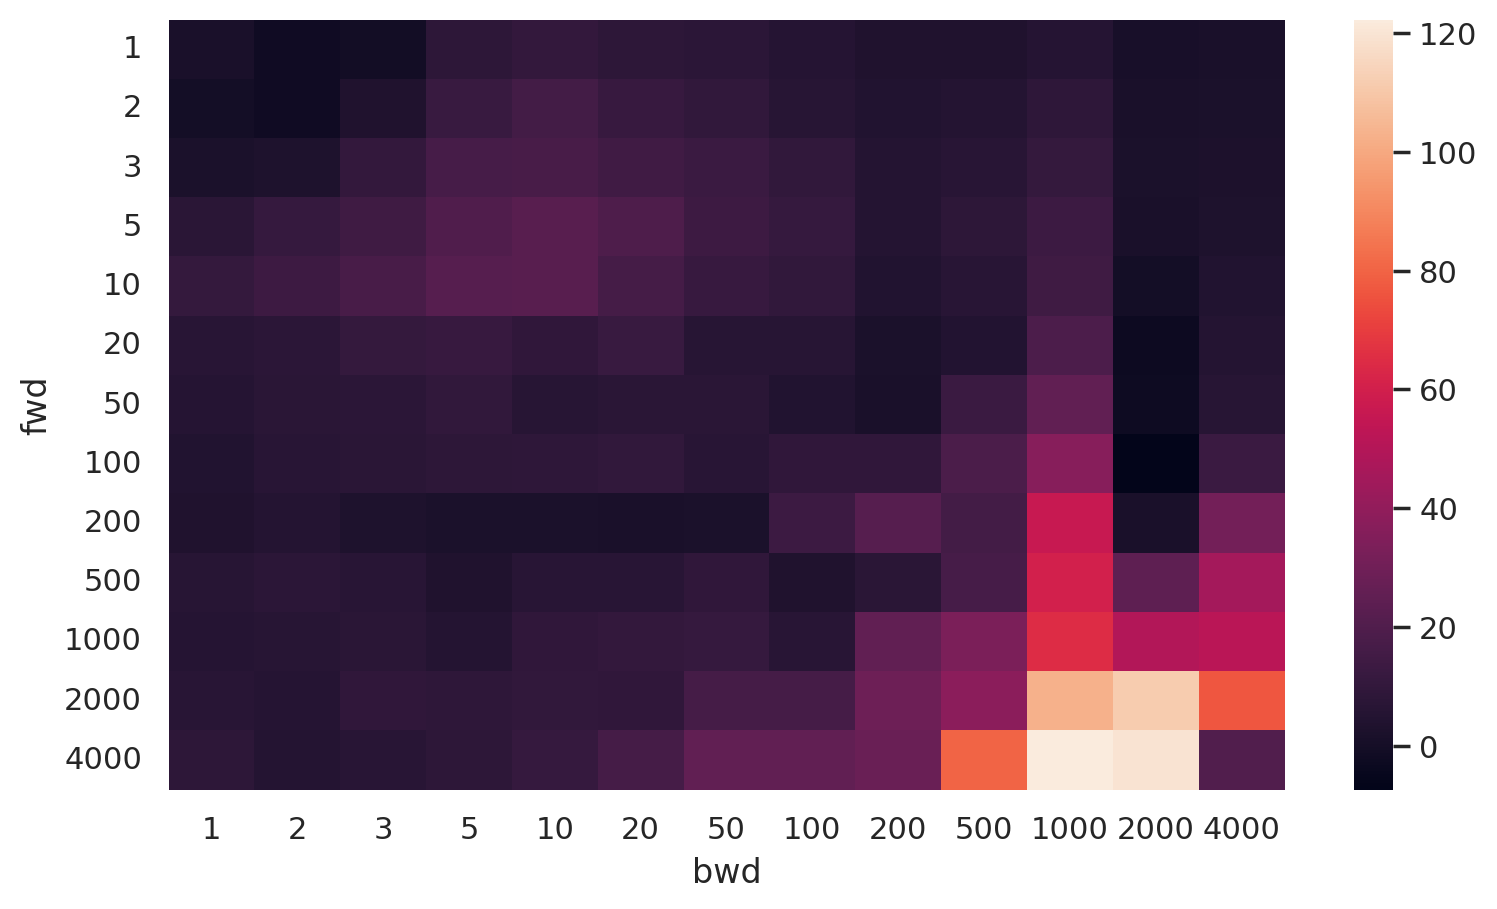

In [76]:
rez_ics = D(rez_ics)
rez_ics.columns.name = 'bwd'
rez_ics.index.name = 'fwd'

rez_sharpes = D(rez_sharpes)
rez_sharpes.columns.name = 'bwd'
rez_sharpes.index.name = 'fwd'

sns.heatmap(rez_sharpes)

rez_sharpes

In [20]:
%%timeit

bwd_wdw = 10
fwd_wdw = 1

sprd = np.log(btc.close).diff() - np.log(eth.close).diff()
# sprd2 = btc.close.pct_change() - eth.close.pct_change()
# sprd
# sprd2b


749 µs ± 45.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
%%timeit

bwd_wdw = 10
fwd_wdw = 1

# sprd = np.log(btc.close).diff() - np.log(eth.close).diff()
sprd2 = btc.close.pct_change() - eth.close.pct_change()
# sprd
# sprd2

740 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
sprd.iloc[1]
sprd2.iloc[1]


-0.0002450283602355441

-0.00024494135362729264

In [12]:
sprd

NameError: name 'sprd' is not defined